In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
fdir = '/Users/cosmology/radiometer/ReadoutApp/observation/'

In [5]:
import glob
from scipy.optimize import curve_fit

In [6]:
fnames = glob.glob(fdir+'*.txt')

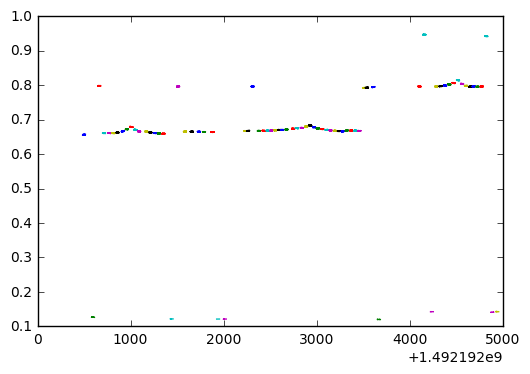

In [14]:
for f in fnames:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [15]:
RUN1 = []
PADDLE1 = []
NITRO1 = []
for f in fnames[:25]:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg <0.5:
        PADDLE1.append(f)
    elif avg < 0.72:
        RUN1.append(f)
    else:
        NITRO1.append(f)

In [16]:
RUN2 = []
PADDLE2 = []
NITRO2 = []
for f in fnames[25:-18]:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg <0.5:
        PADDLE2.append(f)
    elif avg < 0.72:
        RUN2.append(f)
    else:
        NITRO2.append(f)

In [17]:
RUN3 = []
PADDLE3 = []
NITRO3 = []
for f in fnames[-18:]:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg <0.5:
        PADDLE3.append(f)
    elif avg < 0.82:
        RUN3.append(f)
    else:
        NITRO3.append(f)

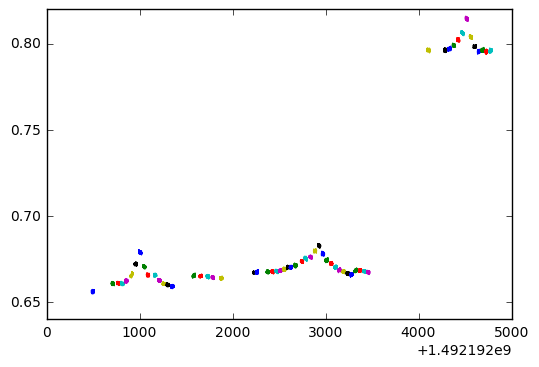

In [18]:
for f in np.concatenate((RUN1,RUN2,RUN3)):
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])


In [47]:
angles1U = []
angles1D = []
switch = 0
for f in RUN1:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            x = fl.readline()
            y=(float(x.split(': ')[1].split('\n')[0]))
            if y == 60:
                switch = 1
            if switch == 0:
                angles1U.append(y*(np.pi/180))
            else:
                angles1D.append(y*(np.pi/180))

In [52]:
angles2U = []
angles2D = []
switch = 0
for f in RUN2:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            x = fl.readline()
            y=(float(x.split(': ')[1].split('\n')[0]))
            if y == 60:
                switch = 1
            if switch == 0:
                angles2U.append(y*(np.pi/180))
            else:
                angles2D.append(y*(np.pi/180))

In [53]:
angles3U = []
angles3D = []
switch = 0
for f in RUN3:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            x = fl.readline()
            y=(float(x.split(': ')[1].split('\n')[0]))
            if y == 60:
                switch = 1
            if switch == 0:
                angles3U.append(y*(np.pi/180))
            else:
                angles3D.append(y*(np.pi/180))

In [54]:
meanRUN1 = []
stddevRUN1 = []
for f in RUN1:
    x = np.loadtxt(f)
    meanRUN1.append(np.mean(x[:,1]))
    stddevRUN1.append(np.std(x[:,1]))

In [55]:
meanRUN2 = []
stddevRUN2 = []
for f in RUN2:
    x = np.loadtxt(f)
    meanRUN2.append(np.mean(x[:,1]))
    stddevRUN2.append(np.std(x[:,1]))

In [56]:
meanRUN3 = []
stddevRUN3 = []
for f in RUN3:
    x = np.loadtxt(f)
    meanRUN3.append(np.mean(x[:,1]))
    stddevRUN3.append(np.std(x[:,1]))

In [62]:
meanRUN1U = meanRUN1[:len(angles1U)]
meanRUN1D = meanRUN1[len(angles1U):]

meanRUN2U = meanRUN2[:len(angles2U)]
meanRUN2D = meanRUN2[len(angles2U):]

meanRUN3U = meanRUN3[:len(angles3U)]
meanRUN3D = meanRUN3[len(angles3U):]

In [66]:
stddevRUN1U = stddevRUN1[:len(angles1U)]
stddevRUN1D = stddevRUN1[len(angles1U):]

stddevRUN2U = stddevRUN2[:len(angles2U)]
stddevRUN2D = stddevRUN2[len(angles2U):]

stddevRUN3U = stddevRUN3[:len(angles3U)]
stddevRUN3D = stddevRUN3[len(angles3U):]

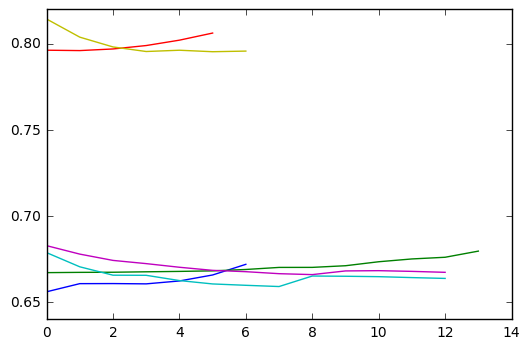

In [63]:
plot (meanRUN1U)
plot (meanRUN2U)
plot (meanRUN3U)

plot (meanRUN1D)
plot (meanRUN2D)
plot (meanRUN3D)

<Container object of 3 artists>

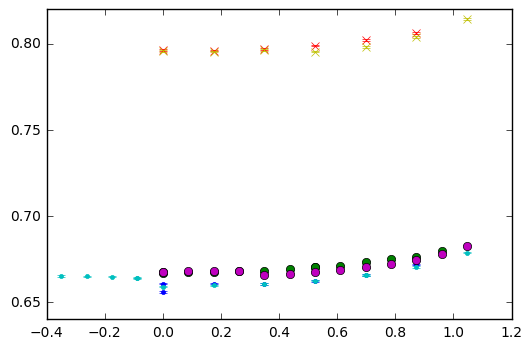

In [70]:
errorbar(angles1U, meanRUN1U, yerr=stddevRUN1U, fmt='.')
errorbar(angles2U, meanRUN2U, yerr=stddevRUN2U, fmt='o')
errorbar(angles3U, meanRUN3U, yerr=stddevRUN3U, fmt='x')

errorbar(angles1D, meanRUN1D, yerr=stddevRUN1D, fmt='.')
errorbar(angles2D, meanRUN2D, yerr=stddevRUN2D, fmt='o')
errorbar(angles3D, meanRUN3D, yerr=stddevRUN3D, fmt='x')

<Container object of 3 artists>

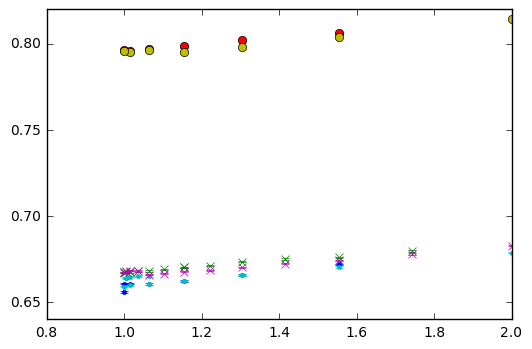

In [72]:
errorbar(1./np.cos(angles1U), meanRUN1U, yerr=stddevRUN1U ,fmt='.')
errorbar(1./np.cos(angles2U), meanRUN2U, yerr=stddevRUN2U ,fmt='x')
errorbar(1./np.cos(angles3U), meanRUN3U, yerr=stddevRUN3U ,fmt='o')

errorbar(1./np.cos(angles1D), meanRUN1D, yerr=stddevRUN1D ,fmt='.')
errorbar(1./np.cos(angles2D), meanRUN2D, yerr=stddevRUN2D ,fmt='x')
errorbar(1./np.cos(angles3D), meanRUN3D, yerr=stddevRUN3D ,fmt='o')

In [73]:
def line(x, m, b):
    return m*x + b

In [74]:
x1U = 1./np.cos(angles1U)
y1U = np.array(meanRUN1U)

x2U = 1./np.cos(angles2U)
y2U = np.array(meanRUN2U)

x3U = 1./np.cos(angles3U)
y3U = np.array(meanRUN3U)

x1D = 1./np.cos(angles1D)
y1D = np.array(meanRUN1D)

x2D = 1./np.cos(angles2D)
y2D = np.array(meanRUN2D)

x3D = 1./np.cos(angles3D)
y3D = np.array(meanRUN3D)

In [76]:
popt1U = curve_fit(line, x1U, y1U, sigma=stddevRUN1U, absolute_sigma=True)
popt2U = curve_fit(line, x2U, y2U, sigma=stddevRUN2U, absolute_sigma=True)
popt3U = curve_fit(line, x3U, y3U, sigma=stddevRUN3U, absolute_sigma=True)

popt1D = curve_fit(line, x1D, y1D, sigma=stddevRUN1D, absolute_sigma=True)
popt2D = curve_fit(line, x2D, y2D, sigma=stddevRUN2D, absolute_sigma=True)
popt3D = curve_fit(line, x3D, y3D, sigma=stddevRUN3D, absolute_sigma=True)

In [77]:
m1U = popt1U[0][0]
b1U = popt1U[0][1]

merr1U= sqrt(popt1U[1][0,0])
berr1U= sqrt(popt1U[1][1,1])

m2U = popt2U[0][0]
b2U = popt2U[0][1]

merr2U= sqrt(popt2U[1][0,0])
berr2U= sqrt(popt2U[1][1,1])

m3U = popt3U[0][0]
b3U = popt3U[0][1]

merr3U= sqrt(popt3U[1][0,0])
berr3U= sqrt(popt3U[1][1,1])

m1D = popt1D[0][0]
b1D = popt1D[0][1]

merr1D= sqrt(popt1D[1][0,0])
berr1D= sqrt(popt1D[1][1,1])

m2D = popt2D[0][0]
b2D = popt2D[0][1]

merr2D= sqrt(popt2D[1][0,0])
berr2D= sqrt(popt2D[1][1,1])

m3D = popt3D[0][0]
b3D = popt3D[0][1]

merr3D= sqrt(popt3D[1][0,0])
berr3D= sqrt(popt3D[1][1,1])

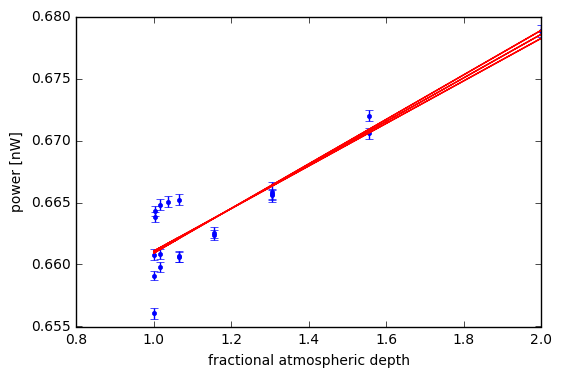

In [33]:
errorbar(x1, y1, yerr=stddevRUN1,fmt='.')
plot(x1, line(x1, m1,b1), 'r')
plot(x1, line(x1, m1+merr1,b1-berr1), 'r')
plot(x1, line(x1, m1-merr1,b1+berr1), 'r')
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

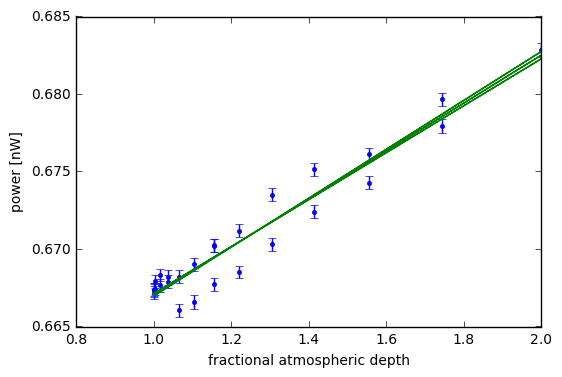

In [34]:
errorbar(x2, y2, yerr=stddevRUN2,fmt='.')
plot(x2, line(x2, m2,b2), 'g')
plot(x2, line(x2, m2+merr2,b2-berr2), 'g')
plot(x2, line(x2, m2-merr2,b2+berr2), 'g')
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

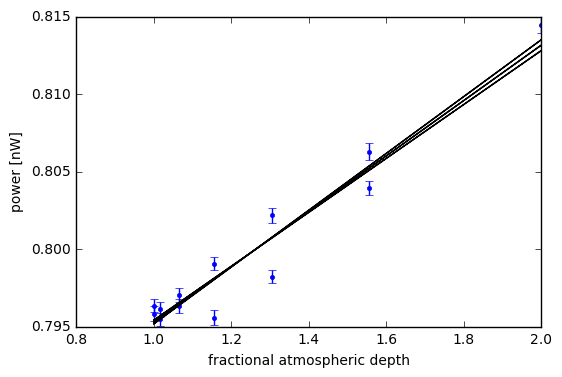

In [35]:
errorbar(x3, y3, yerr=stddevRUN3,fmt='.')
plot(x3, line(x3, m3,b3), 'k')
plot(x3, line(x3, m3+merr3,b3-berr3), 'k')
plot(x3, line(x3, m3-merr3,b3+berr3), 'k')
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

In [78]:
Npower1 = []
Nerr1 = []
for f in NITRO1:
    x = np.loadtxt(f)
    Npower1.append(np.mean(x[:,1]))
    Nerr1.append(np.std(x[:,1]))
    
Npower2 = []
Nerr2 = []
for f in NITRO2:
    x = np.loadtxt(f)
    Npower2.append(np.mean(x[:,1]))
    Nerr2.append(np.std(x[:,1]))
    
Npower3 = []
Nerr3 = []
for f in NITRO3:
    x = np.loadtxt(f)
    Npower3.append(np.mean(x[:,1]))
    Nerr3.append(np.std(x[:,1]))

In [79]:
Ppower1 = []
Ptemp1 = []
Perr1 = []
Terr1 = []
for f in PADDLE1:
    x = np.loadtxt(f)
    Ppower1.append(np.mean(x[:,1])*10)
    Ptemp1.append(np.mean(x[:,2]))
    Perr1.append(np.std(x[:,1]*10))
    Terr1.append(np.std(x[:,2]))

Ppower2 = []
Ptemp2 = []
Perr2 = []
Terr2 = []
for f in PADDLE2:
    x = np.loadtxt(f)
    Ppower2.append(np.mean(x[:,1])*10)
    Ptemp2.append(np.mean(x[:,2]))
    Perr2.append(np.std(x[:,1]*10))
    Terr2.append(np.std(x[:,2]))
    
Ppower3 = []
Ptemp3 = []
Perr3 = []
Terr3 = []
for f in PADDLE3:
    x = np.loadtxt(f)
    Ppower3.append(np.mean(x[:,1])*10)
    Ptemp3.append(np.mean(x[:,2]))
    Perr3.append(np.std(x[:,1]*10))
    Terr3.append(np.std(x[:,2]))

<Container object of 3 artists>

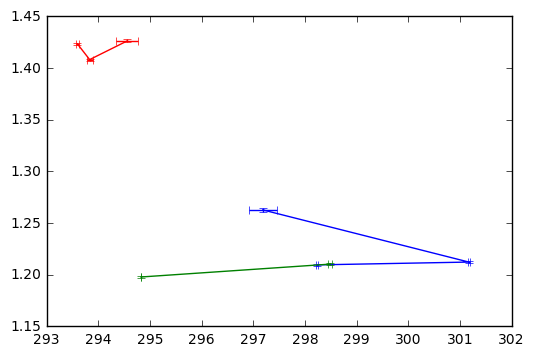

In [80]:
errorbar(Ptemp1, Ppower1, yerr=Perr1, xerr=Terr1)
errorbar(Ptemp2, Ppower2, yerr=Perr2, xerr=Terr2)
errorbar(Ptemp3, Ppower3, yerr=Perr3, xerr=Terr3)

#3rd Blue Point sucks, but it's even worse when removed ¯\_(ツ)_/¯ 
#idk what's up with the red one (diff polarization)
#Add 1 kelvin error

<Container object of 3 artists>

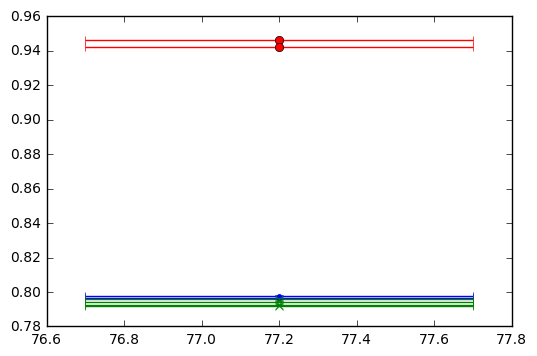

In [81]:
errorbar(77.2*np.ones(len(Npower1)), Npower1, yerr=Nerr1 ,xerr=.5*np.ones(len(Npower1)), fmt='.')
errorbar(77.2*np.ones(len(Npower2)), Npower2, yerr=Nerr2 ,xerr=.5*np.ones(len(Npower2)), fmt='x')
errorbar(77.2*np.ones(len(Npower3)), Npower3, yerr=Nerr3 ,xerr=.5*np.ones(len(Npower3)), fmt='o')

#Take new error from the gain fluctuation
#Maybe divide power data by creatd line to negate gain drift
#Check if gain fluc is a f(t) or if it's random

In [82]:
xc1 = np.concatenate([77.2*np.ones(len(Npower1)), Ptemp1])
yc1 = np.concatenate([Npower1, Ppower1])

xc2 = np.concatenate([77.2*np.ones(len(Npower2)), Ptemp2])
yc2 = np.concatenate([Npower2, Ppower2])

xc3 = np.concatenate([77.2*np.ones(len(Npower3)), Ptemp3])
yc3 = np.concatenate([Npower3, Ppower3])

In [83]:
Calib1 = curve_fit(line, yc1, xc1, sigma = (.5*np.ones(len(xc1))), absolute_sigma=True)
Calib2 = curve_fit(line, yc2, xc2, sigma = (.5*np.ones(len(xc2))), absolute_sigma=True)
Calib3 = curve_fit(line, yc3, xc3, sigma = (.5*np.ones(len(xc3))), absolute_sigma=True)


In [84]:
print Calib1
print Calib2
print Calib3

(array([ 509.73088782, -327.96835352]), array([[ 1.11213376, -1.17417798],
       [-1.17417798,  1.28968354]]))
(array([ 534.77508505, -347.28331015]), array([[ 1.11337018, -1.03604972],
       [-1.03604972,  1.00576561]]))
(array([ 456.17907447, -353.5278892 ]), array([[ 0.9230059 , -1.13470384],
       [-1.13470384,  1.4449562 ]]))


In [94]:
print line(b1U, *Calib1[0])
print line(b2U, *Calib2[0])
print line(b3U, *Calib3[0])
print line(b1D, *Calib1[0])
print line(b2D, *Calib2[0])
print line(b3D, *Calib3[0])

print(np.mean([-line(b1U, *Calib1[0]),line(b2U, *Calib2[0]),line(b3U, *Calib3[0]), line(b1D, *Calib1[0]),line(b2D, *Calib2[0]), line(b3D, *Calib3[0])]))

-3.97173730285
0.625391856908
1.07955129993
1.41351930417
1.00502242415
0.327891369137
1.40385225953


In [44]:
Gerr1= sqrt(Calib1[1][0,0])
Terr1= sqrt(Calib1[1][1,1])

Gerr2= sqrt(Calib2[1][0,0])
Terr2= sqrt(Calib2[1][1,1])

Gerr3= sqrt(Calib3[1][0,0])
Terr3= sqrt(Calib3[1][1,1])

In [45]:
Perr1 = sqrt((b1*(Calib1[0][0])*sqrt((berr1/b1)**2+(Gerr1/Calib1[0][0])**2))**2+Terr1**2)
Perr2 = sqrt((b2*(Calib2[0][0])*sqrt((berr2/b2)**2+(Gerr2/Calib2[0][0])**2))**2+Terr2**2)
Perr3 = sqrt((b3*(Calib3[0][0])*sqrt((berr3/b3)**2+(Gerr3/Calib3[0][0])**2))**2+Terr3**2)

In [46]:
print Perr1
print Perr2
print Perr3

1.34478518377
1.23423169879
1.44048279743
